In [1]:
import numpy as  np
import pandas as pd

np.random.seed(4)
volume = np.random.randint(100000, 1000000, 1000)
open_price = np.random.randint(100, 500, 1000)
high = open_price + np.random.randint(0, 50, 1000)
low = open_price - np.random.randint(0, 50, 1000)
news_sentiment = np.random.randint(-10, 11, 1000)
close_price = (open_price + high + low) / 3 + news_sentiment * 2 + np.random.randint(-5, 5, 1000)


In [2]:
df = pd.DataFrame({
    "Volume": volume,
    "Open": open_price,
    "High": high,
    "Low": low,
    "Sentiment": news_sentiment,
    "Close": close_price
})
csv_filename = "Stock_price_data.csv"
df.to_csv(csv_filename, index = False)
print(f"Dataset saved as '{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset saved as 'Stock_price_data.csv' with 1000 rows and 6 columns.


In [3]:
import pandas as pd
df= pd.read_csv("Stock_price_data.csv")
print(df.head())

   Volume  Open  High  Low  Sentiment       Close
0  585815   335   382  332          5  355.666667
1  477541   384   387  365         10  398.666667
2  220705   387   428  365          5  403.333333
3  753672   127   136   91          3  121.000000
4  739432   371   381  324         -5  343.666667


In [4]:
print("\nMissing Values:\n", df.isnull().sum())
print("\n Dataset Summary:\n", df.describe())


Missing Values:
 Volume       0
Open         0
High         0
Low          0
Sentiment    0
Close        0
dtype: int64

 Dataset Summary:
               Volume         Open         High          Low    Sentiment  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   551211.959000   299.725000   323.835000   275.282000    -0.045000   
std    264794.640886   117.549493   118.566242   118.703804     6.076504   
min    100572.000000   100.000000   102.000000    56.000000   -10.000000   
25%    320748.250000   200.000000   223.750000   175.000000    -5.000000   
50%    551124.500000   298.000000   320.000000   276.000000     0.000000   
75%    790413.750000   400.000000   427.250000   373.250000     5.000000   
max    998518.000000   499.000000   542.000000   495.000000    10.000000   

             Close  
count  1000.000000  
mean    299.120000  
std     118.221575  
min      75.333333  
25%     197.083333  
50%     298.000000  
75%     398.666667  
max   

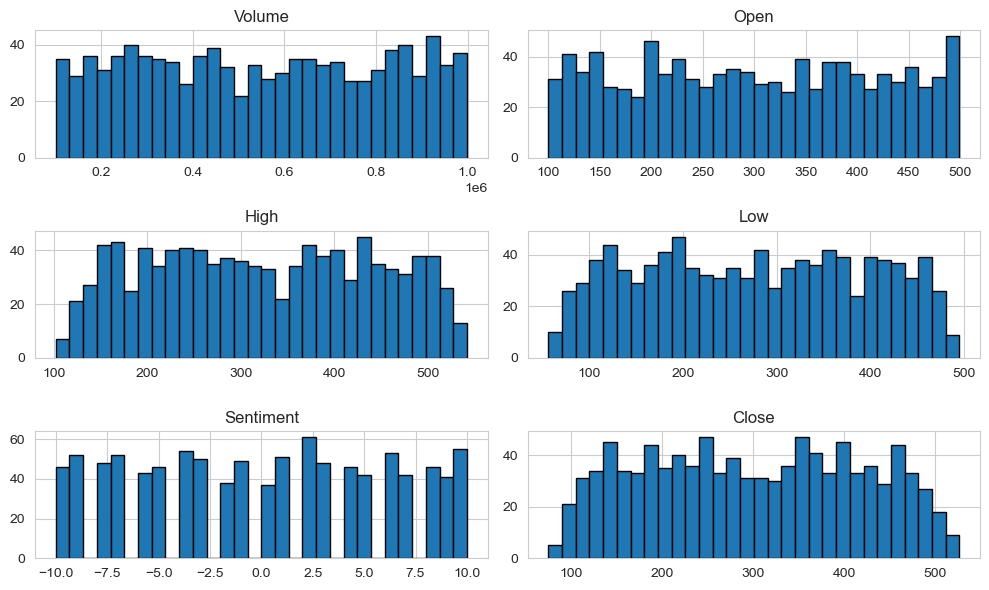

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
df.hist(figsize=(10,6),bins=30,edgecolor="black")
plt.tight_layout()
plt.show()

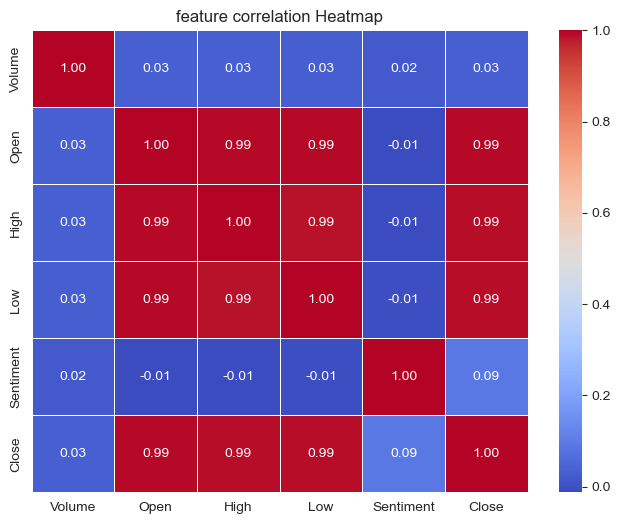

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("feature correlation Heatmap")
plt.show()

In [12]:
x = df[["Low", "High", "Open", "Volume", "Sentiment"]]
y = df["Close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nSALES PERFORMANCE:\nMAR: {mae:.2f}, R2 score: {r2:.2f}")


SALES PERFORMANCE:
MAR: 2.43, R2 score: 1.00


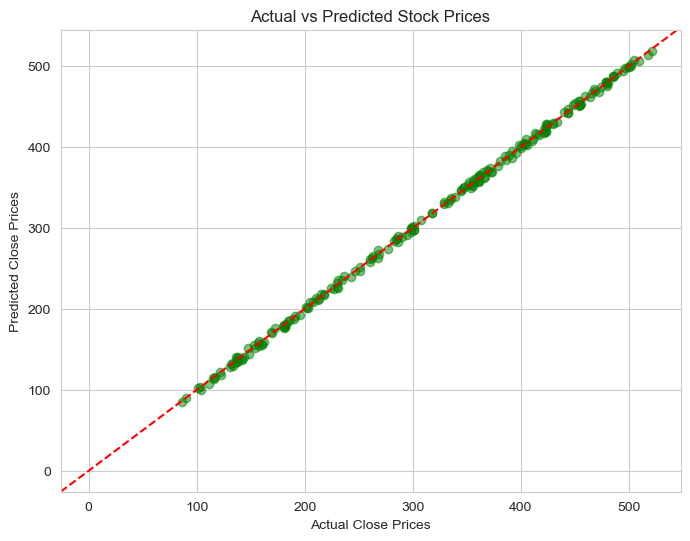

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="green")
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.title("Actual vs Predicted Stock Prices")
plt.axline([0, 0], slope=1, color="red", linestyle="--")
plt.show()